<a href="https://colab.research.google.com/github/astaroth816/sandpool/blob/master/Stock_Pridiction_by__LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install the yfinance

In [ ]:
!pip install yfinance -q

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, TimeDistributed, Flatten
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import math
from sklearn.preprocessing import MinMaxScaler

## 1. The stock information about 2376.TW

In [ ]:
Stock_2376_TW = yf.Ticker('2376.TW')

In [ ]:
df_2376_TW= Stock_2376_TW.history(start='2006-01-01', end = date.today())

In [ ]:
data = df_2376_TW.Close

## 2. Train / Test data

In [ ]:
data_Close = data.values
train_len = math.ceil(len(data_Close) * 0.8) 

In [ ]:
data_Close = data_Close.reshape(-1, 1)

### Scale the data_Close by MinMax in range( 0, 1 )

In [ ]:
Normalize = MinMaxScaler(feature_range=(0, 1))
data_Close = Normalize.fit_transform(data_Close)

### train_test_split(test_size = 0.2)

In [ ]:
train_data, test_data = data_Close[0:train_len, :], data_Close[train_len:len(data_Close), :1]

## 3.Train / Test data preprocessing for compible the Deep Learning Model

### x_train, y_train preprocessing

In [ ]:
x_train = []
y_train = []
for i in range(100, len(train_data)):
   x_train.append(train_data[i-100:i, 0])
   y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

### x_test, y_test preprocessing

In [ ]:
x_test = []
y_test = []
for i in range(100, len(test_data)):
   x_test.append(test_data[i-100:i, 0])
   y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

## 4. Build the LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer = 'adam')
history = model.fit(x_train,y_train, batch_size = 64, epochs = 20 , verbose = 1)

Epoch 1/20
48/48 [==============================] - 9s 68ms/step - loss: 0.0013
Epoch 2/20
48/48 [==============================] - 3s 68ms/step - loss: 1.1857e-04
Epoch 3/20
48/48 [==============================] - 3s 68ms/step - loss: 1.1001e-04
Epoch 4/20
48/48 [==============================] - 3s 68ms/step - loss: 1.1147e-04
Epoch 5/20
48/48 [==============================] - 3s 68ms/step - loss: 8.8722e-05
Epoch 6/20
48/48 [==============================] - 3s 68ms/step - loss: 8.3690e-05
Epoch 7/20
48/48 [==============================] - 3s 68ms/step - loss: 8.0462e-05
Epoch 8/20
48/48 [==============================] - 3s 68ms/step - loss: 7.9678e-05
Epoch 9/20
48/48 [==============================] - 3s 68ms/step - loss: 6.9834e-05
Epoch 10/20
48/48 [==============================] - 3s 69ms/step - loss: 7.5487e-05
Epoch 11/20
48/48 [==============================] - 3s 68ms/step - loss: 6.6617e-05
Epoch 12/20
48/48 [==============================] - 3s 68ms/step - loss: 7.09

In [ ]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_61 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_62 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_63 (LSTM)              (None, 50)                20200     
                                                                 
 dense_38 (Dense)            (None, 50)                2550      
                                                                 
 dense_39 (Dense)            (None, 1)                 51        
                                                                 
Total params: 53,401
Trainable params: 53,401
Non-trainable params: 0
_________________________________________________________________


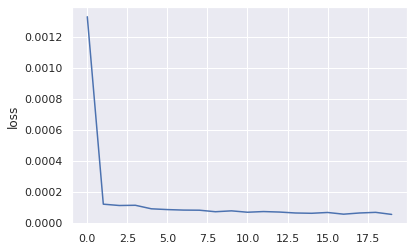

In [ ]:
sns.set()
df_history = pd.DataFrame(history.history)
sns.lineplot(x = df_history.index, y = df_history.loss)

## 5. Compare the prediction and reality

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_test = y_test.reshape(-1, 1)

In [ ]:
y_pred = Normalize.inverse_transform(y_pred)
y_test = Normalize.inverse_transform(y_test)

In [ ]:
y_pred = y_pred.reshape(len(y_pred), 1)
y_test = y_test.reshape(len(y_pred), 1)

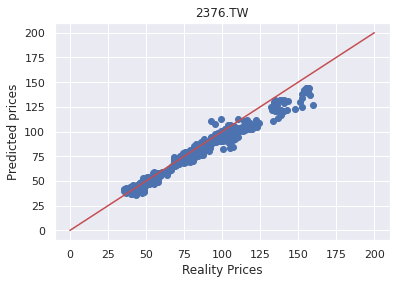

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([100*x for x in range(3)], [100*x for x in range(3)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('2376.TW')
plt.show()
plt.clf()

In [ ]:
df_pred = pd.DataFrame(y_pred, columns = ['Prediction'], index = df_2376_TW.index[train_len +100:])

In [ ]:
df_pred['Reality'] = y_test

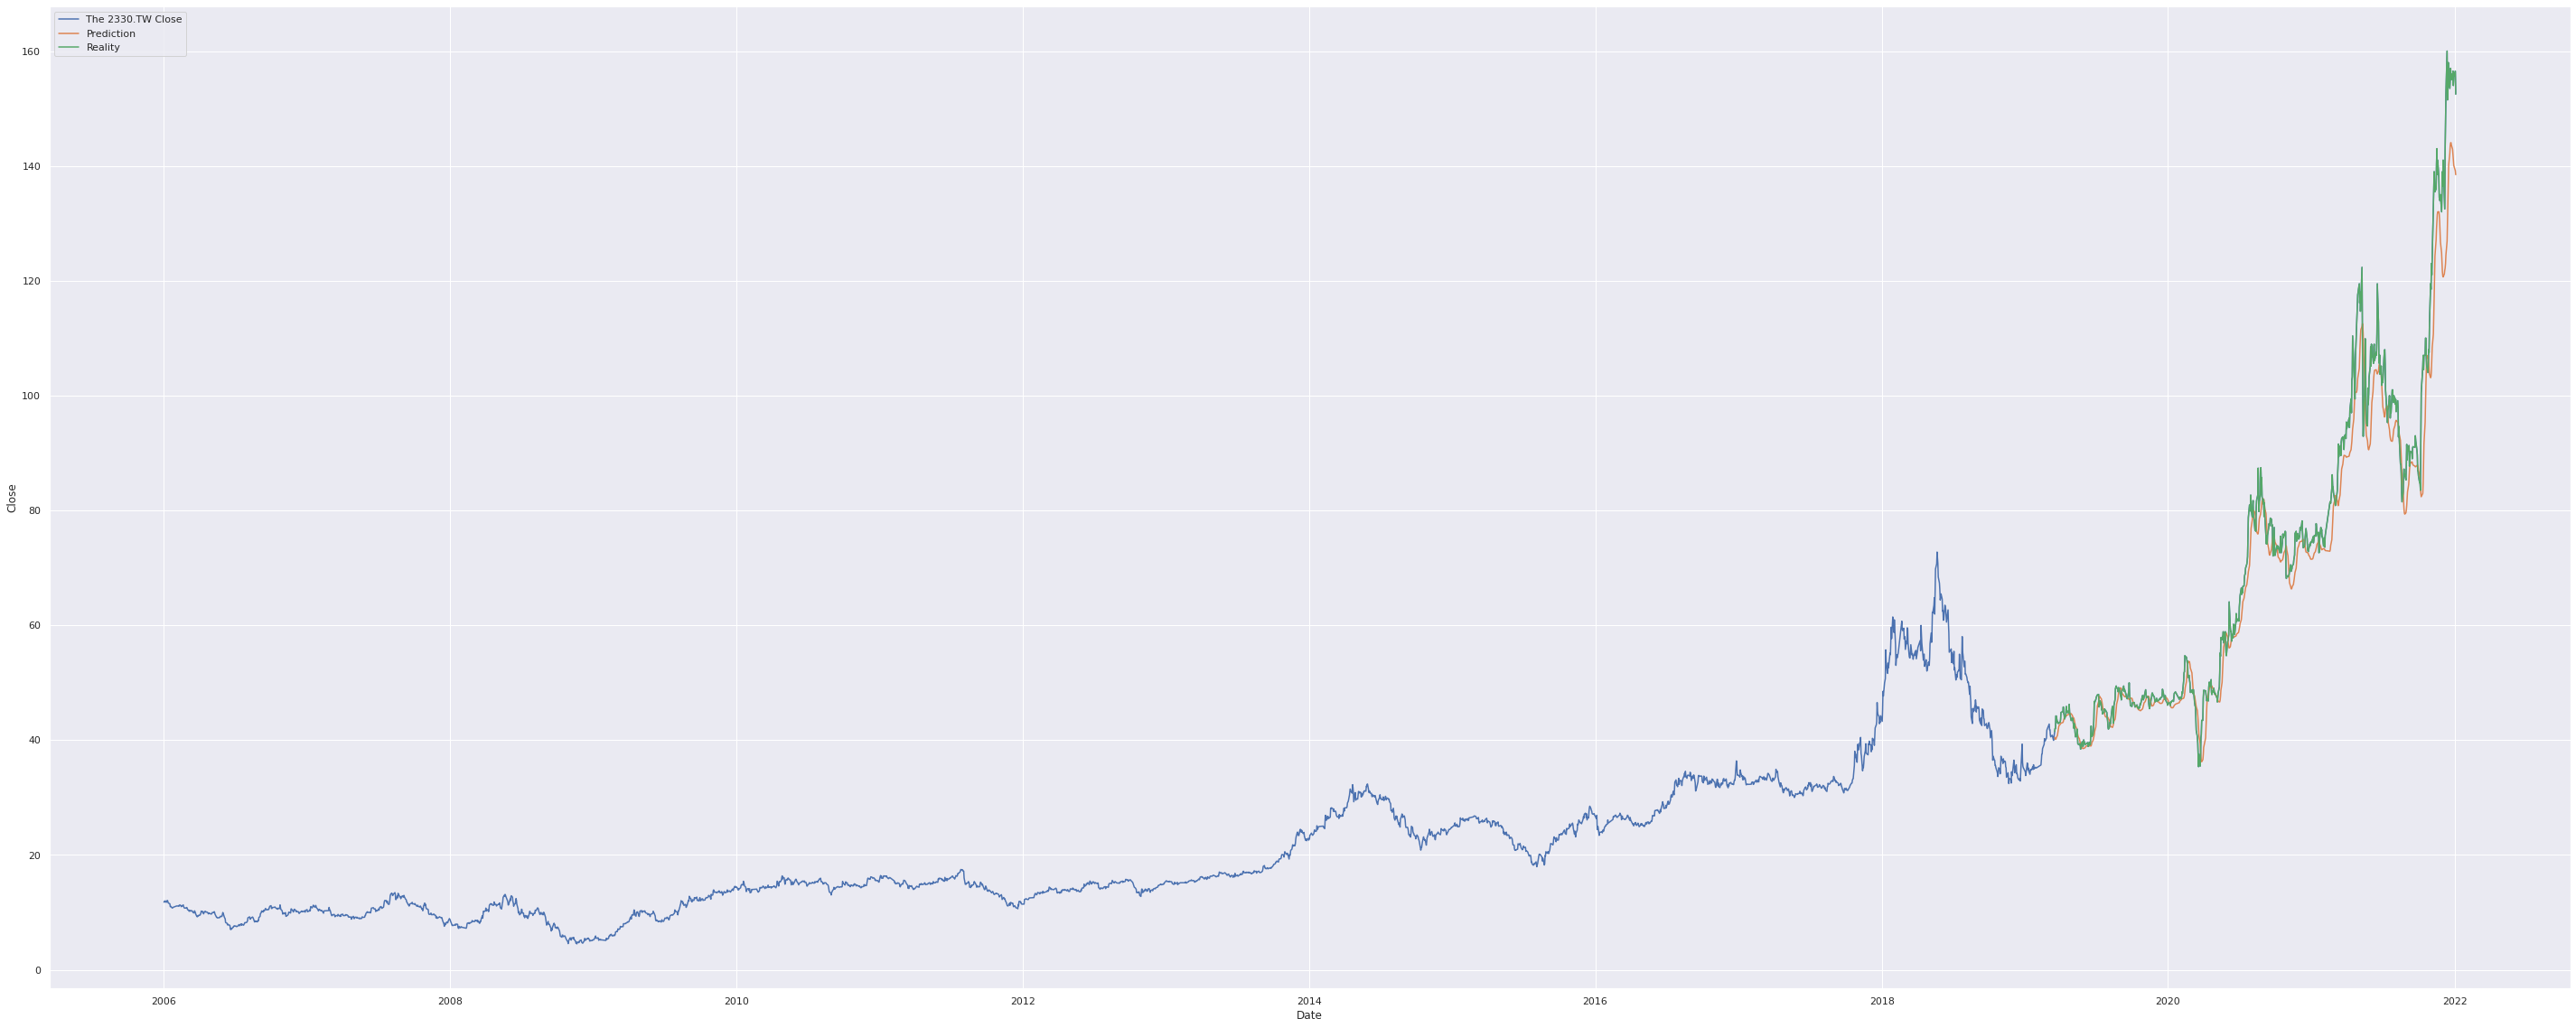

In [ ]:
plt.figure(figsize = (50, 20))
sns.lineplot(x = df_2376_TW.index, y = df_2376_TW.Close, label = 'The 2330.TW Close')
sns.lineplot(x = df_pred.index, y = df_pred.Prediction, label = 'Prediction')
sns.lineplot(x = df_pred.index, y = df_pred.Reality, label = 'Reality')
plt.legend()
plt.show()

## 6. Prediction the next day

In [ ]:
last_100 = data[-100 : ].values
last_100 = last_100.reshape(-1, 1)
last_100 = Normalize.fit_transform(last_100)

In [ ]:
tomorrow = []
tomorrow.append(last_100)
tomorrow = np.array(tomorrow)
#prediciton
pred_price = model.predict(tomorrow)
tomorrow_price = Normalize.inverse_transform(pred_price)

In [ ]:
tomorrow_price

array([[146.80786]], dtype=float32)

## 7. Prediction the next 5 days

In [ ]:
hundra = list(data[-100 :].values)
for i in range(5):
  process = np.array(hundra[-100:]).reshape(-1, 1)
  process = Normalize.fit_transform(process)
  process = process.reshape(1, 100, 1)
  next_price = model.predict(process)
  nextday_price = Normalize.inverse_transform(next_price)
  hundra.append(nextday_price.tolist()[0][0])



Text(0.5, 1.0, 'Prediction for next 5 days')

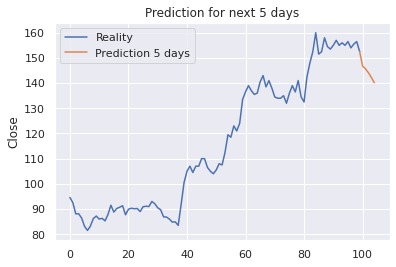

In [ ]:
sns.lineplot(x = [x for x in range(len(hundra)-5)], y = hundra[ : -5], label = 'Reality')
sns.lineplot(x = [len(hundra)-6 + x for x in range(6)], y = hundra[ -6: ], label = 'Prediction 5 days')
plt.ylabel('Close')
plt.title('Prediction for next 5 days')